<a href="https://colab.research.google.com/github/gabrielborja/python_data_analysis/blob/main/bysykkel_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bysykkel Oslo

## Uploading packages and data

In [1]:
#Importing necessary packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Remove previous versions of the uploaded excel file
!rm 2021_05_bysykkel.csv

rm: cannot remove '2021_05_bysykkel.csv': No such file or directory


In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving 2021_05_bysykkel.csv to 2021_05_bysykkel.csv


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
by_df = pd.read_csv(io.BytesIO(uploaded['2021_05_bysykkel.csv']), parse_dates=True, infer_datetime_format=True)

In [ ]:
#Checking the dataframe information
by_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144625 entries, 0 to 144624
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   started_at                 144625 non-null  object 
 1   ended_at                   144625 non-null  object 
 2   duration                   144625 non-null  int64  
 3   start_station_id           144625 non-null  int64  
 4   start_station_name         144625 non-null  object 
 5   start_station_description  144623 non-null  object 
 6   start_station_latitude     144625 non-null  float64
 7   start_station_longitude    144625 non-null  float64
 8   end_station_id             144625 non-null  int64  
 9   end_station_name           144625 non-null  object 
 10  end_station_description    144623 non-null  object 
 11  end_station_latitude       144625 non-null  float64
 12  end_station_longitude      144625 non-null  float64
dtypes: float64(4), int64(3), obje

##Initial Data manipulation and aggregation



In [ ]:
#Convert columns into datetime object and Oslo timezone
by_df['started_at'] = pd.to_datetime(by_df['started_at'], format='%Y-%m-%d %H:%M:%S').dt.tz_convert('Europe/Oslo')
by_df['ended_at'] = pd.to_datetime(by_df['ended_at'], format='%Y-%m-%d %H:%M:%S').dt.tz_convert('Europe/Oslo')
by_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144625 entries, 0 to 144624
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype                      
---  ------                     --------------   -----                      
 0   started_at                 144625 non-null  datetime64[ns, Europe/Oslo]
 1   ended_at                   144625 non-null  datetime64[ns, Europe/Oslo]
 2   duration                   144625 non-null  int64                      
 3   start_station_id           144625 non-null  int64                      
 4   start_station_name         144625 non-null  object                     
 5   start_station_description  144623 non-null  object                     
 6   start_station_latitude     144625 non-null  float64                    
 7   start_station_longitude    144625 non-null  float64                    
 8   end_station_id             144625 non-null  int64                      
 9   end_station_name           144625 non

In [ ]:
#Checking the dataframe head
by_df.head(2)

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2021-05-01 05:02:08.105000+02:00,2021-05-01 05:07:05.124000+02:00,297,565,Mailundveien,sør for Torshovdalen,59.930918,10.77282,493,Sofienbergparken nordvest,langs Helgesens Gate,59.924364,10.761586
1,2021-05-01 05:06:49.811000+02:00,2021-05-01 05:17:37.118000+02:00,647,459,Valkyrieplassen,ved Bogstadveien,59.928132,10.71842,499,Bjerregaards gate,ovenfor Fredrikke Qvams gate,59.925488,10.746058


In [ ]:
#Creating 2 dataframes, one with starting trips and one with end trips
st_df = by_df[['started_at', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'duration']]
en_df = by_df[['ended_at', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'duration']]

In [ ]:
#Creating a function to extract categories from datetime object
def convert_dates(df):
  """Extract year, month, week number, day, hour and minutes from datetime column"""
  df = df.assign(year = df.iloc[:,0].dt.year,
                 month = df.iloc[:,0].dt.month_name(),
                 weeknum = df.iloc[:,0].dt.isocalendar().week,
                 day = df.iloc[:,0].dt.day_name(),
                 hour = df.iloc[:,0].dt.hour,
                 minute = df.iloc[:,0].dt.minute
                 )
  return df

In [ ]:
#Converting dates for starting journeys dataframe
st_df = convert_dates(st_df)
st_df.head(2)

,started_at,start_station_id,start_station_name,start_station_latitude,start_station_longitude,duration,year,month,weeknum,day,hour,minute
0,2021-05-01 05:02:08.105000+02:00,565,Mailundveien,59.930918,10.77282,297,2021,May,17,Saturday,5,2
1,2021-05-01 05:06:49.811000+02:00,459,Valkyrieplassen,59.928132,10.71842,647,2021,May,17,Saturday,5,6


In [ ]:
#Converting dates for end journeys dataframe
en_df = convert_dates(en_df)
en_df.head(2)

,ended_at,end_station_id,end_station_name,end_station_latitude,end_station_longitude,duration,year,month,weeknum,day,hour,minute
0,2021-05-01 05:07:05.124000+02:00,493,Sofienbergparken nordvest,59.924364,10.761586,297,2021,May,17,Saturday,5,7
1,2021-05-01 05:17:37.118000+02:00,499,Bjerregaards gate,59.925488,10.746058,647,2021,May,17,Saturday,5,17


In [ ]:
#Computing Top start_location stations
st_loc = st_df.groupby(['year', 'month', 'start_station_name', 'start_station_latitude', 'start_station_longitude']).agg({'start_station_id': 'count',
                                                                                                         'duration': 'mean'}).reset_index()
st_loc = st_loc.assign(duration = round(st_loc['duration']/60, 2))
st_loc = st_loc.rename(columns={'start_station_id': 'trips', 'duration': 'mean_min'}).sort_values(by='trips', ascending=False).reset_index(drop=True)
st_loc = st_loc.rename(columns={'start_station_name':'name', 'start_station_latitude':'lat', 'start_station_longitude':'lon'})
st_loc.head(10)

,year,month,name,lat,lon,trips,mean_min
0,2021,May,Alexander Kiellands Plass,59.928067,10.751203,2137,11.62
1,2021,May,Ringnes Park,59.928434,10.759430,1900,10.93
2,2021,May,Olaf Ryes plass,59.922425,10.758182,1661,12.92
3,2021,May,Bislettgata,59.923774,10.734713,1533,11.77
4,2021,May,Rådhusbrygge 4,59.910847,10.730377,1515,17.29
5,2021,May,Storo Storsenter,59.946710,10.773805,1492,14.70
6,2021,May,Sukkerbiten,59.905124,10.753764,1442,18.30
7,2021,May,Majorstuen,59.929045,10.716926,1400,12.83
8,2021,May,Bislett Stadion,59.925471,10.731219,1360,11.98
9,2021,May,Marcus Thranes gate,59.932772,10.758595,1352,11.62


In [ ]:
#Computing top hours by month
st_hr = st_df.groupby(['year', 'month', 'hour']).agg({'start_station_id': 'count'}).reset_index()
st_hr = st_hr.rename(columns={'start_station_id': 'count'}).sort_values(by='hour').reset_index(drop=True)
st_hr

,year,month,hour,count
0,2021,June,0,40
1,2021,May,0,1628
2,2021,May,1,2
3,2021,May,3,1
4,2021,May,5,453
5,2021,May,6,1894
6,2021,May,7,6330
7,2021,May,8,8820
8,2021,May,9,6172
9,2021,May,10,5625


In [ ]:
#Computing Top end_location stations
en_loc = en_df.groupby(['year', 'month', 'end_station_name', 'end_station_latitude', 'end_station_longitude']).agg({'end_station_id': 'count',
                                                                                                   'duration': 'mean'}).reset_index()
en_loc = en_loc.assign(duration = round(en_loc['duration']/60, 2))
en_loc = en_loc.rename(columns={'end_station_id': 'trips', 'duration': 'mean_min'}).sort_values(by='trips', ascending=False).reset_index(drop=True)
en_loc = en_loc.rename(columns={'end_station_name':'name', 'end_station_latitude':'lat', 'end_station_longitude':'lon'})
en_loc.head(10)

,year,month,name,lat,lon,trips,mean_min
0,2021,May,Rådhusbrygge 4,59.910847,10.730377,2839,15.74
1,2021,May,Olaf Ryes plass,59.922425,10.758182,2186,12.01
2,2021,May,Alexander Kiellands Plass,59.928067,10.751203,2128,11.41
3,2021,May,Ringnes Park,59.928434,10.759430,1900,11.00
4,2021,May,Kirkeristen,59.913000,10.746761,1802,11.33
5,2021,May,Tjuvholmen,59.909467,10.722509,1712,14.58
6,2021,May,Sukkerbiten,59.905124,10.753764,1710,19.19
7,2021,May,Helga Helgesens plass,59.912111,10.766194,1628,12.82
8,2021,May,Torggata,59.915983,10.751551,1555,11.54
9,2021,May,Sjøsiden ved trappen,59.910154,10.751981,1514,14.68


In [ ]:
#Computing top hours by month
en_hr = en_df.groupby(['year', 'month', 'hour']).agg({'end_station_id': 'count'}).reset_index()
en_hr = en_hr.rename(columns={'end_station_id': 'count'}).sort_values(by='hour').reset_index(drop=True)
en_hr

,year,month,hour,count
0,2021,June,0,51
1,2021,May,0,1803
2,2021,June,1,5
3,2021,May,1,336
4,2021,May,2,5
5,2021,May,3,4
6,2021,May,5,366
7,2021,May,6,1547
8,2021,May,7,5385
9,2021,May,8,8781


In [ ]:
#Exporting to csv into local disk
from google.colab import files
st_loc.to_csv('2021_05_st_loc.csv', index=False, header=False)
files.download('2021_05_st_loc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Exporting to csv into local disk
from google.colab import files
st_hr.to_csv('2021_05_st_hr.csv', index=False, header=False)
files.download('2021_05_st_hr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Exporting to excel into local disk
from google.colab import files
en_loc.to_csv('2021_05_en_loc.csv', index=False, header=False)
files.download('2021_05_en_loc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Exporting to csv into local disk
from google.colab import files
en_hr.to_csv('2021_05_en_hr.csv', index=False, header=False)
files.download('2021_05_en_hr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Cleaning aggregated data

In [ ]:
#Using OS from the command line to merge historic data
type 202*_**_en_hr.csv > en_hr_merged.csv
type 202*_**_en_loc.csv > en_loc_merged.csv
type 202*_**_st_hr.csv > st_hr_merged.csv
type 202*_**_st_loc.csv > st_loc_merged.csv

##Cleaning aggregated data (hours of day)

In [3]:
#Uploading aggregated data files from local drive
from google.colab import files
uploaded1 = files.upload()

Saving st_hr_merged.csv to st_hr_merged.csv


In [5]:
#Reading aggregated data and storing into a Pandas Dataframe
import io
hr_col = ['year', 'month', 'hour', 'count']
hours_df = pd.read_csv(io.BytesIO(uploaded1['st_hr_merged.csv']), header=None, names=hr_col)

In [6]:
#Checking the dataframe info
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    336 non-null    int64 
 1   month   336 non-null    object
 2   hour    336 non-null    int64 
 3   count   336 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 10.6+ KB


In [7]:
#Check the dataframe head
hours_df.head(10)

,year,month,hour,count
0,2020,April,0,19
1,2020,March,0,164
2,2020,March,5,76
3,2020,March,6,437
4,2020,March,7,1234
5,2020,March,8,1288
6,2020,March,9,845
7,2020,March,10,958
8,2020,March,11,1497
9,2020,March,12,1976


In [8]:
#Order the hours data and aggregate the hour count
hours_df = hours_df.groupby(['year', 'month', 'hour']).agg({'count': 'sum'}).reset_index()

In [ ]:
hours_df.tail(50)

In [9]:
#Verifying slices of the dataframe
hours_df[(hours_df['year']==2021) & (hours_df['month']=='April')]

,year,month,hour,count
219,2021,April,0,962
220,2021,April,5,293
221,2021,April,6,1652
222,2021,April,7,5587
223,2021,April,8,7290
224,2021,April,9,4599
225,2021,April,10,4244
226,2021,April,11,5496
227,2021,April,12,6766
228,2021,April,13,7337


In [20]:
#Exporting hours data to csv into local disk
from google.colab import files
hours_df.to_csv('st_hr_cleaned.csv', index=False)
files.download('st_hr_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Clean aggregated data (location)

In [81]:
#Uploading aggregated data files from local drive
from google.colab import files
uploaded2 = files.upload()

Saving st_loc_merged.csv to st_loc_merged.csv


In [82]:
#Reading aggregated data and storing into a Pandas Dataframe
import io
loc_col = ['year', 'month', 'name',	'lat',	'lon',	'trips',	'mean_min']
loc_df = pd.read_csv(io.BytesIO(uploaded2['st_loc_merged.csv']), header=None, names=loc_col)

In [83]:
#Checking the dataframe info
loc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4288 entries, 0 to 4287
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      4288 non-null   int64  
 1   month     4288 non-null   object 
 2   name      4288 non-null   object 
 3   lat       4288 non-null   float64
 4   lon       4288 non-null   float64
 5   trips     4288 non-null   int64  
 6   mean_min  4288 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 234.6+ KB


In [84]:
#Check the dataframe head
loc_df.head(5)

,year,month,name,lat,lon,trips,mean_min
0,2020,March,Ringnes Park,59.928434,10.759430,463,16.80
1,2020,March,Alexander Kiellands Plass,59.928067,10.751203,452,14.31
2,2020,March,Tjuvholmen,59.909467,10.722509,395,22.51
3,2020,March,Sukkerbiten,59.905807,10.753657,376,19.74
4,2020,March,Bislett Stadion,59.925471,10.731219,373,15.62


In [85]:
#Group by categories and aggregate both trips and mean value
loc_df = loc_df.groupby(['year', 'month', 'name', 'lat', 'lon']).agg({'trips': 'sum',
                                                                      'mean_min': 'mean'}
                                                                     ).reset_index()

In [86]:
#Sort values by year, month and trips
loc_df = loc_df.sort_values(by=['year', 'month', 'trips'], ascending=False).reset_index(drop=True)

In [88]:
loc_df.tail(10)

,year,month,name,lat,lon,trips,mean_min
3764,2020,April,Georg Morgenstiernes hus,59.939026,10.723003,112,16.320
3765,2020,April,Kjeld Stubs gate,59.912711,10.735595,111,12.950
3766,2020,April,Fysikkbygningen,59.937957,10.719489,91,15.690
3767,2020,April,Stortingstunellen,59.910653,10.737365,89,22.980
3768,2020,April,Vippetangen øst,59.903989,10.741077,89,21.240
3769,2020,April,Tordenskiolds gate,59.911776,10.735113,88,15.610
3770,2020,April,Blindern studentparkering,59.940874,10.720779,70,17.860
3771,2020,April,Jarlsborgveien,59.930464,10.675783,66,20.200
3772,2020,April,HasleLinje,59.927634,10.799249,64,15.425
3773,2020,April,Bak Niels Treschows hus sør,59.942473,10.723715,45,14.200


In [89]:
#Verifying slices of the dataframe in descending order
loc_df[(loc_df['year']==2021) & (loc_df['month']=='April')]

,year,month,name,lat,lon,trips,mean_min
1037,2021,April,Ringnes Park,59.928434,10.759430,1572,9.145
1038,2021,April,Alexander Kiellands Plass,59.928067,10.751203,1524,9.915
1039,2021,April,Majorstuen,59.929045,10.716926,1289,14.010
1040,2021,April,Bislettgata,59.923774,10.734713,1242,12.170
1041,2021,April,Rådhusbrygge 4,59.910847,10.730377,1189,17.590
...,...,...,...,...,...,...,...
1282,2021,April,Skøyen Stasjon,59.922724,10.678625,70,22.280
1283,2021,April,Stortingstunellen,59.910653,10.737365,69,19.510
1284,2021,April,Arkaden Sør,59.911969,10.747858,62,15.070
1285,2021,April,Salt,59.906922,10.746530,50,21.340


In [90]:
#Exporting hours data to csv into local disk
from google.colab import files
loc_df.to_csv('st_loc_cleaned.csv', index=False)
files.download('st_loc_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Data Visualization

###Loading data, packages and custom theme

In [15]:
#Add interactivity to graphs
import ipywidgets as widgets
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [16]:
#Uploading visualization packages
import folium
from folium import plugins
from folium.plugins import HeatMap

In [10]:
#Customizing data visualization styles

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title

In [17]:
#Customizing dark theme
plt.style.use(['dark_background'])
plt.rcParams['axes.facecolor'] = (0,0,0,0)
plt.rcParams['figure.facecolor'] = '#383838' #To match google colab native dark theme
plt.rcParams["legend.frameon"] = False
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams["legend.facecolor"] = (0,0,0,0)
#plt.rcParams["font.family"] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = ['Open Sans', 'Source Sans Pro', 'Noto Sans']
plt.rcParams['hist.bins'] = 50
plt.rcParams['lines.markersize'] = 10
plt.rcParams['axes3d.grid'] = False

#New settings
plt.rcParams['figure.subplot.hspace'] = 0.3 #default = 0.2

from cycler import cycler

plt.rcParams['axes.prop_cycle'] = (cycler(color=['#98d2eb', '#e1f2fe', '#b2b1cf', '#77625c', '#49392c', '#bde2f5', '#cad2e7', '#958a96', '#604e44', '#5a4b3f'])\
                                   + cycler(linestyle=['-', '--', ':', '-.', '-', '--', ':', '-.', '-', '--']))

In [ ]:
#Remove previous versions of the uploaded csv file
!rm 2021_04_st_loc.csv

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded1 = files.upload()

In [ ]:
#Reading aggregated data and storing into a Pandas Dataframe
import io
st_loc = pd.read_csv(io.BytesIO(uploaded1['2021_04_st_loc.csv']))

###Preparing data for visualization

In [ ]:
#Drop name columns
hm_df = st_loc.copy()
hm_df = hm_df.drop(columns=['year', 'month', 'name', 'mean_min'])
hm_df.head()

,lat,lon,trips
0,59.928434,10.759430,3745
1,59.928067,10.751203,3508
2,59.922425,10.758182,3326
3,59.925471,10.731219,3271
4,59.915983,10.751551,2811


In [ ]:
#Create a function to convert lat, lon, and weight to list. Folium does not take DataFrames
def convert_to_list(df):
  """Convert dataframe to list of lat, lon and weight"""
  lat = df['lat'].to_numpy(dtype=float)
  lon = df['lon'].to_numpy(dtype=float)
  weight = df['trips'].to_numpy(dtype=float)
  return [[l, g, w] for l, g, w in zip(lat, lon, weight)]

In [ ]:
#Convert lat, long and weight to list
heat_data = convert_to_list(hm_df)
heat_data[:5]

[[59.92843404417578, 10.75943014633117, 3745.0],
 [59.92806670615685, 10.751202636819613, 3508.0],
 [59.922425, 10.758182000000001, 3326.0],
 [59.925471317049954, 10.73121932213806, 3271.0],
 [59.915983092745186, 10.75155119076095, 2811.0]]

In [ ]:
#Creating a function to generate a basemap
def generate_basemap(default_loc=[59.92,10.75], default_zoom=13):
    bmap = folium.Map(location=default_loc, zoom_start=default_zoom)
    return bmap

In [ ]:
#Generating a basemap
basemap = generate_basemap()

In [ ]:
#Creating a HeatMap with lat, lon and number of trips
HeatMap(heat_data[:10]).add_to(basemap)

In [ ]:
#Creating a function to plot the interactive dashboard

def plot_dashboard(year, month):
  """Plot the starting point of trips, location and average minutes per station """
  
  #Creating a slice and copy of input dataframe
  df = st_loc.copy()
  df = df[(df['year']==year) & (df['month']==month)][:5]
  
  #Creating constants for plotting
  siblred = ['#C0C0C0', '#4374B3', '#FF0B04'] #=>#RdYlGn_r | nipy_spectral

  #Create four subplots and unpack the output array immediately
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

  #Set title for the figure
  fig.suptitle("Bysykkel Dashboard - Under construction", fontsize=24)

  #Accessing axes objects and plotting
  
  sns.barplot(x='name', y='trips', data=df, ax=ax1)
  #basemap = generate_basemap()
  sns.barplot(x='name', y='mean_min', data=df, ax=ax3)
    
  #Customizing axes labels and titles for first axes figure
  ax1.set_xlabel('Station names')
  ax1.set_ylabel('Number of Trips')
  ax1.set_title('Top starting trips')
  
  #Customizing axes labels and titles for second axes figure
  ax2.set_title('Top endpoint trips')

  #Customizing axes labels and titles for third axes figure
  ax3.set_xlabel('Station names')
  ax3.set_ylabel('Average minutes')
  ax3.set_title('Average minute ride')

  #Prevent from axis to colliding or overlaping one another.
  fig.tight_layout()
  fig.subplots_adjust(top=0.88)

###Dashboard

In [ ]:
#Generating widgets options
yr = [2020]
month = ['September']

#Plotting Complaints for Oslo Plant with interactive widgets
interact(plot_dashboard,
         year=widgets.Dropdown(options=yr, value=yr[0], description='Year', disabled=False),
         month=widgets.Dropdown(options=month, value=month[0], description='Month', disabled=False))
plt.show()

interactive(children=(Dropdown(description='Year', options=(2020,), value=2020), Dropdown(description='Month',…

In [ ]:
#Plotting basemap for starting point of trips
basemap

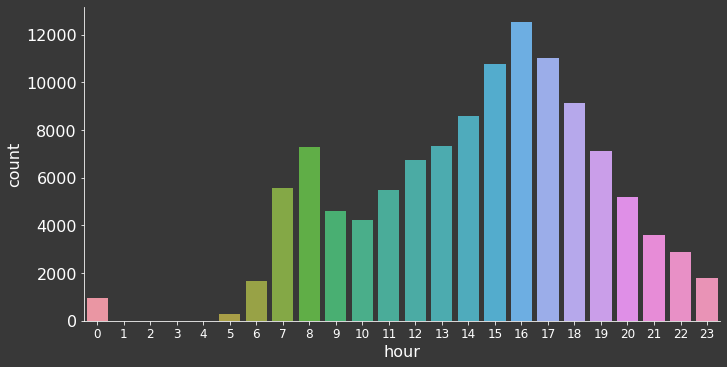

In [19]:
#Test: Plotting the rush hours for a given month
ord = [i for i in range(0, 24)]
sns.catplot(x='hour', y='count', data=hours_df[(hours_df['year']==2021) & (hours_df['month']=='April')], kind='bar', order=ord, ci=False, height=5, aspect=2)
plt.show()